<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 1: What is Machine Learning and how is it related to Physics? 
======

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rc('figure', figsize=(8,4) )         # Image size

import seaborn as sns


# Simple Regression problem
What do you think "Machine Learning (ML)" is?


Consider the spring example in the notes. 
Let's see how the actual data would look like. 


In [ ]:
'''This data is taken from lab report of students in Phys_Lab 3.'''

import io, requests

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Spring.csv'
s = requests.get(url).content
exp_data = pd.read_csv(io.StringIO(s.decode('utf-8')))


exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


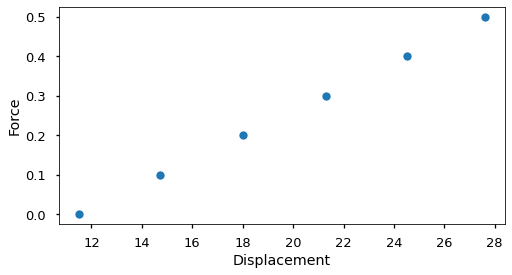

In [ ]:
sns.scatterplot(data=exp_data, x='Displacement', y='Force')

In [ ]:
## Build a simple model

def model(displacement):
  ## design your model here
  f= .01*displacement + .01*displacement**2
  return f

In [ ]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(model)
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,1.4375
1,14.7,0.1,2.3079
2,18.0,0.2,3.4200
3,21.3,0.3,4.7499
4,24.5,0.4,6.2475
5,27.6,0.5,7.8936


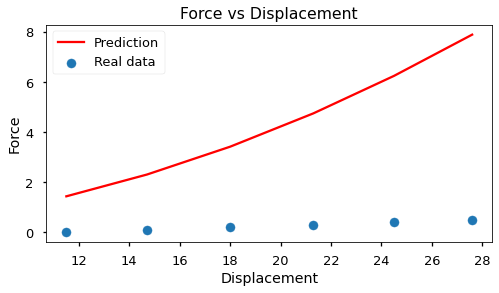

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
plt.legend(loc=0)
plt.show()


In [ ]:
## Calculate the distance between the prediction and the real data  => Loss

def dist(Y, Y_pred):

  d = np.sum(np.abs( Y - Y_pred ))  ## replace this with what you think is good for the loss

  return d 

## now calculate the distance between your prediction and the actual force. 
dist( exp_data.Force , exp_data.Model_Prediction )  

24.556400000000004

## Finding a better model

Try to play with your model to improve it. 

What does it mean to improve the model?



In [ ]:
'''
Parametric Model:
Here I make a model that has some parameters that we can play with. 
'''

def model(displacement, w=0):
  ## Let's make a linear model with 0 interception. 
  f = w * displacement 

  return f


In [ ]:
## Let's see what the predictions are:
[model(x, .1) for x in exp_data.Displacement]

[1.1500000000000001, 1.47, 1.8, 2.1300000000000003, 2.45, 2.7600000000000002]

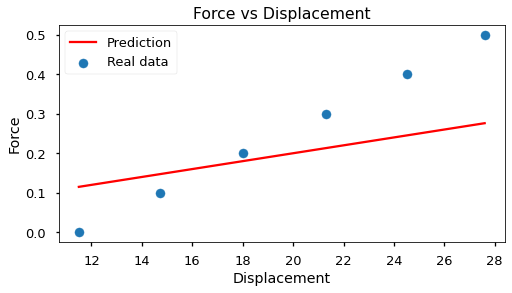

The distance between prediction and real data is 0.6479999999999999.


In [ ]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, .01))
exp_data

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction',c='r')
plt.legend(loc=0)
plt.show()
print(f'The distance between prediction and real data is {dist( exp_data.Force , exp_data.Model_Prediction )   }.')

In [ ]:
from ipywidgets import interact, fixed, FloatSlider

# @interact
def plot_both(w):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, w))
  
  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  # plt.ylim(-.1,.7)
  plt.legend(loc=0)
  # plt.show()
  plt.close(fig)
  return fig

interact(plot_both, w=FloatSlider(min=0.0, max=.05, step=.0001, value=0))

interactive(children=(FloatSlider(value=0.0, description='w', max=0.05, step=0.0001), Output()), _dom_classes=…

<function __main__.plot_both>

### Learning

Find the best model that you can!

Explain the process!


CPU times: user 1.72 s, sys: 0 ns, total: 1.72 s
Wall time: 1.78 s


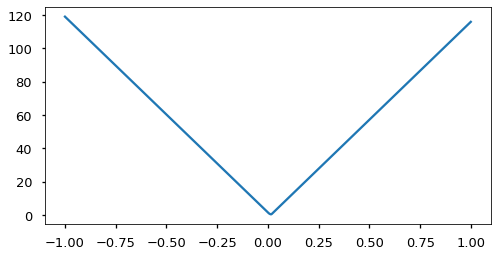

In [ ]:
%%time
## Plot distance vs param
dparam = .001
dist_list = [dist( exp_data.Force , model(exp_data.Displacement , p) )  for p in np.arange(-1,1,dparam)  ]
plt.plot(np.arange(-1,1,dparam), dist_list )

In [ ]:
print(f'The optimal value for w seems to be around {np.arange(-1,1,.0001)[np.argmin(dist_list)]}.\n')
print(f'For this value of w, the loss is {dist( exp_data.Force , model(exp_data.Displacement , 0.0141) )}.' )


The optimal value for w seems to be around -0.8986000000000112.

For this value of w, the loss is 0.48894.


In [ ]:
### Two parameter model:

'''
Parametric Model:
Here I make a model that has some parameters that we can play with. 
'''

def model(displacement, w=0, b=0):
  ## Let's make a linear model with 0 interception. 
  f = w * displacement + b

  return f


In [ ]:
## Let's see what the predictions are:
[model(x, .1,.1) for x in exp_data.Displacement]

[1.2500000000000002,
 1.57,
 1.9000000000000001,
 2.2300000000000004,
 2.5500000000000003,
 2.8600000000000003]

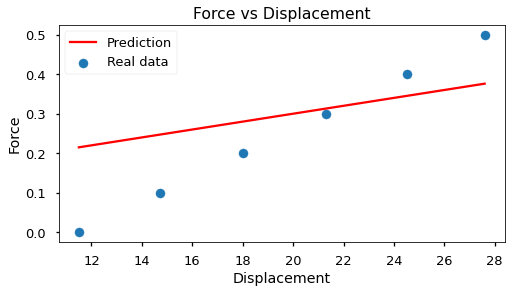

The distance between prediction and real data is 0.6340000000000001.


In [ ]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, .01, .1))
exp_data

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
plt.legend(loc=0)
plt.show()
print(f'The distance between prediction and real data is {dist( exp_data.Force , exp_data.Model_Prediction )   }.')

In [ ]:
from ipywidgets import interact, fixed, FloatSlider

# @interact
def plot_both(w,b):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, w,b))
  
  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  # plt.ylim(-.1,.7)
  plt.legend(loc=0)
  # plt.show()
  plt.close(fig)
  return fig

interact(plot_both, w=FloatSlider(min=0.0, max=.05, step=.0001, value=0),
         b=FloatSlider(min=-1, max=1.0, step=.0001, value=0))

interactive(children=(FloatSlider(value=0.0, description='w', max=0.05, step=0.0001), FloatSlider(value=0.0, d…

<function __main__.plot_both>

The index for the optimal values are (13, 66).

The optimal values are (0.029999999999999943, -0.3399999999999994).

The min loss values is 0.0240.

CPU times: user 57.5 ms, sys: 1.01 ms, total: 58.5 ms
Wall time: 57 ms


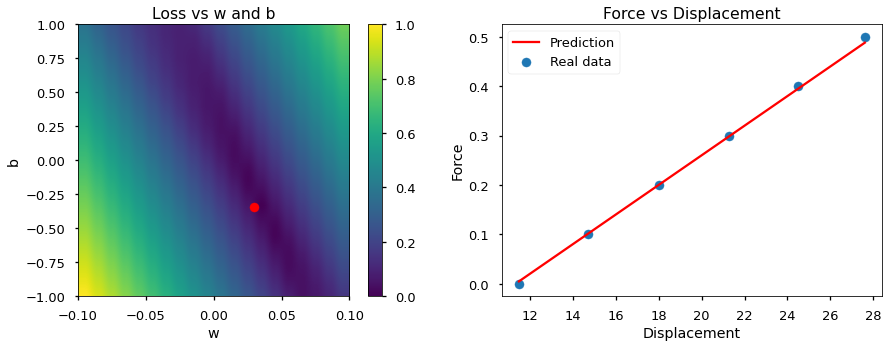

In [ ]:
%%time
## Plot distance vs param
dist_list = np.array([[dist( exp_data.Force , 
                   model(exp_data.Displacement , w,b) )  for w in np.arange(-.1,.1,.01)  ] for b in np.arange(-1,1,.01)])

## The index for the optimal values are:
opt_ind = np.unravel_index( np.argmin(dist_list ), dist_list.shape )
print(f'The index for the optimal values are {opt_ind[::-1]}.\n')

## The optimal values are :
opt_param = np.arange(-.1,.1,.01)[opt_ind[1]], np.arange(-1,1,.01)[opt_ind[0]]
print(f'The optimal values are {opt_param}.\n')

# The min loss values is :
print(f'The min loss values is {dist_list[opt_ind]:.4f}.\n')


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, xlabel='w', ylabel='b', title='Loss vs w and b')

plt.imshow(dist_list, extent=[-.1,.1,-1,1], aspect=.10, origin='lower')
plt.scatter(*opt_param, c='r')
plt.colorbar()

ax = fig.add_subplot(122, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')
plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.plot(exp_data.Displacement, model(exp_data.Displacement , opt_param[0], opt_param[1]) , label='Prediction', c='r')
plt.legend(loc=0)


### Using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

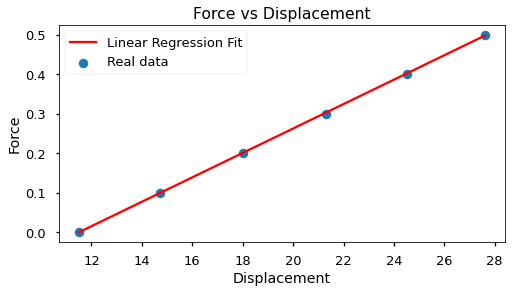

In [ ]:
'''
We first train an estimator which  finds a good fit to the data.
'''

reg = LinearRegression()  ## Defines/Constructs the estimator
reg.fit(exp_data.Displacement.values.reshape(-1,1), exp_data.Force)  ##Trains the estimator

x = np.arange(0,5,.1).reshape(50,1)  

### Now we plot the 
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
ax.plot(exp_data.Displacement, reg.predict( exp_data.Displacement.values.reshape(-1,1) ) ,  
        label='Linear Regression Fit' , c= 'r')
plt.legend(loc=0)
plt.show()


In [ ]:
print(f'The optimal w is {reg.coef_} and the optimal b is {reg.intercept_}.\n')
print('This is in reasonable agreement with the ones we got.')

The optimal w is [0.03091545] and the optimal b is -0.3559427572645836.

This is in reasonable agreement with the ones we got.


#Exercise 


### Balck Body Radiation
Do the same for the black body radiation. 

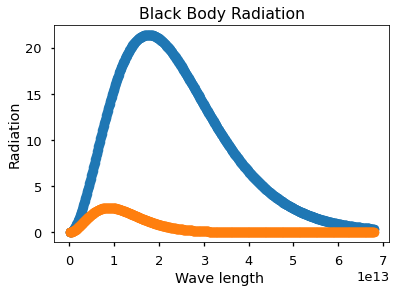

In [4]:
#####BBR###### 
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"
data_bbr = pd.read_excel(url)

n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(data_bbr[0][::n_s_rate], 10**20*data_bbr['T'][::n_s_rate])
ax.scatter(data_bbr[0][::n_s_rate], 10**20*data_bbr['T/2'][::n_s_rate])
plt.show()

In [5]:
data_bbr.head(2)

,0,T,0.1,T/2,0.2
0,88182000000,2.978514e-23,2.997673e-23,1.478758e-23,1.498837e-23
1,176364000000,1.183007e-22,1.199069e-22,5.831636e-23,5.995346e-23


In [19]:
'''
Exercise:
Find a fit and plot them along side the data. 

- Use X and Y defined here. 
- Build a model
- Plot your model with the data

Can you use the simple model we had before?
Is it easy to guess the parameters of the model?
'''

In [20]:
X = data_bbr[0].values.reshape(-1,1)
Y = 10**17*data_bbr['T']

In [21]:
### Let's try a simple model to see how this works:
from sklearn.linear_model import SGDRegressor
sgd_rg = SGDRegressor( loss='squared_loss'  )
sgd_rg.fit(X,Y)
sgd_rg.score(X,Y)

-1.3734728557935933e+76

In [22]:
### Calcualte the distance between the predicted Y and the actual Y, how good is it?
Y_pred = sgd_rg.predict(X)
from sklearn.metrics import mean_squared_error
print(f'The MSE is {mean_squared_error(Y, Y_pred)}')

The MSE is 7.576863105576173e+71


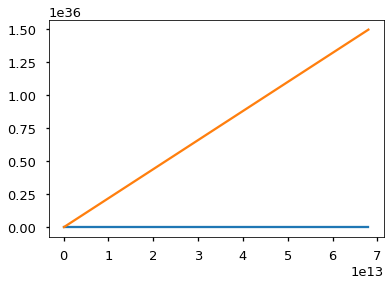

In [17]:
plt.plot(X,Y)
plt.plot(X,Y_pred)
## Not a good fit, how can we improve this?

## Multi-feature data

Do the same for the following data.

In [ ]:
'''
We need to first import the data. I took the data from the following kaggle dataset. 

https://www.kaggle.com/burakhmmtgl/energy-molecule

These are the ground state energies of some molecules based on their different 
chemical bounds. 
'''
import io, requests
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,6.134338,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,6.974135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,2.897620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,5.175577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,2.895051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


Exercise 

Do the same, find a model and find a way to compare your results against actual ground state energies. 


In [ ]:
'''
Do the same, find a model and find a way to compare your results against actual ground state energies. 
'''


